* Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('./datasets/eda_df.csv', index_col = 0)

# Areas of attack

**A plot of all attack points in the dataset**

In [3]:
df.country.value_counts()[:10]

international waters    1280
indonesia                621
bangladesh               210
malaysia                 196
philippines              182
nigeria                  130
peru                      80
colombia                  80
vietnam                   74
yemen                     73
Name: country, dtype: int64

In [4]:
m = folium.Map(zoom_start = 100)
df.apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), 
                                       radius = 1, 
                                       opacity = .5).add_to(m), axis = 1)
m

#https://www.kaggle.com/subinium/how-to-use-folium-geospatial-data

**Distribution of pirate encounters**

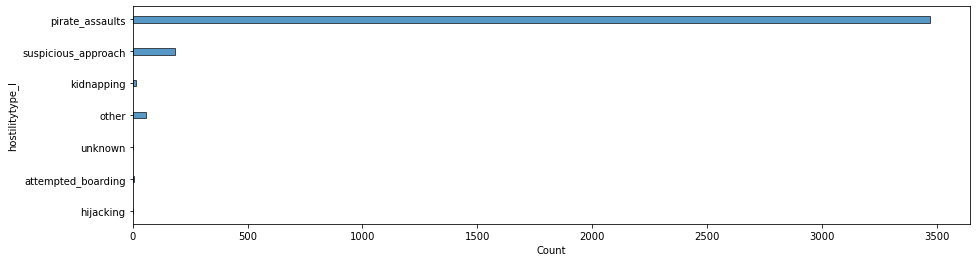

In [5]:
plt.figure(figsize = (15,4))
sns.histplot(data = df, y = 'hostilitytype_l', shrink = .2);

![Subregions]('./img/Subregions.png')

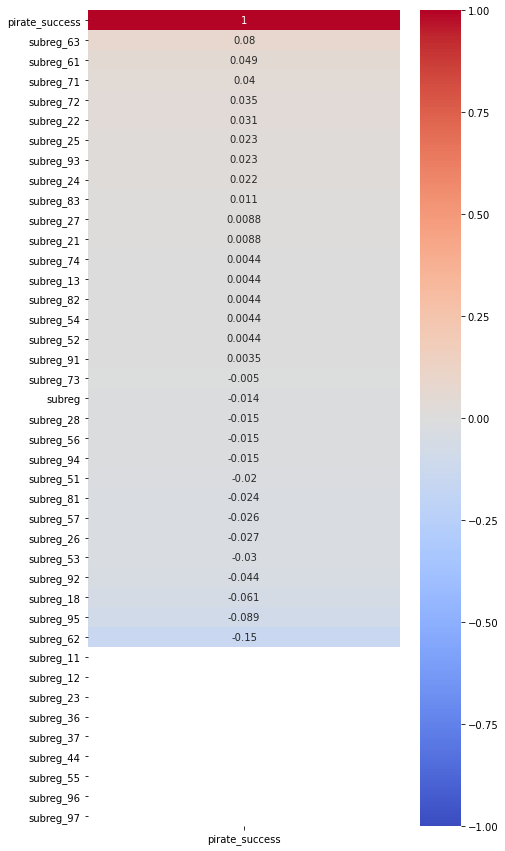

In [6]:
#Show which subregions pirates are most successfull in. 

sub_reg_cols = [x for x in df.columns if x[:6] in 'subreg' or x == 'pirate_success']

plt.figure(figsize=(7, 15))
sns.heatmap(df[sub_reg_cols].corr()[['pirate_success']].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

# Pirate attacks over time

**Pirate attacks by year**

<Figure size 1800x360 with 0 Axes>

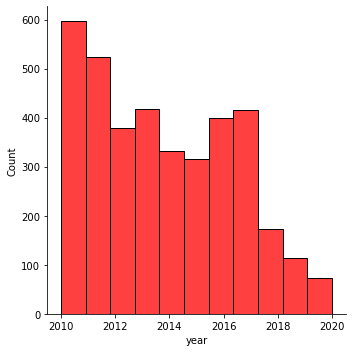

In [7]:
plt.figure(figsize = (25,5))
sns.displot(data = df, x = 'year',color = 'red', bins = len(df['year'].value_counts()));

**Pirate success rate by month**

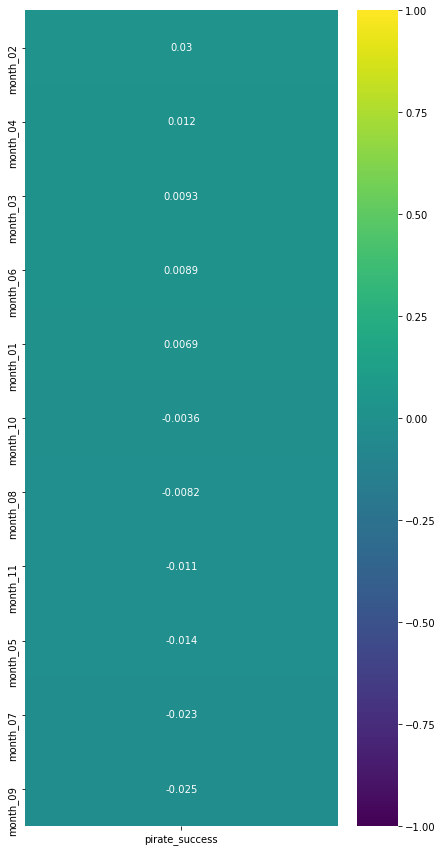

In [27]:
#Show which subregions pirates are most successfull in. 

month_cols = [x for x in df.columns if x[:6] == 'month_' or x == 'pirate_success']

plt.figure(figsize=(7, 15))
sns.heatmap(df[month_cols].corr()[['pirate_success']][:-2].sort_values('pirate_success', ascending = False),
            annot=True, cmap='viridis', vmin=-1, vmax=1);

**Distribution of pirate attacks by month**

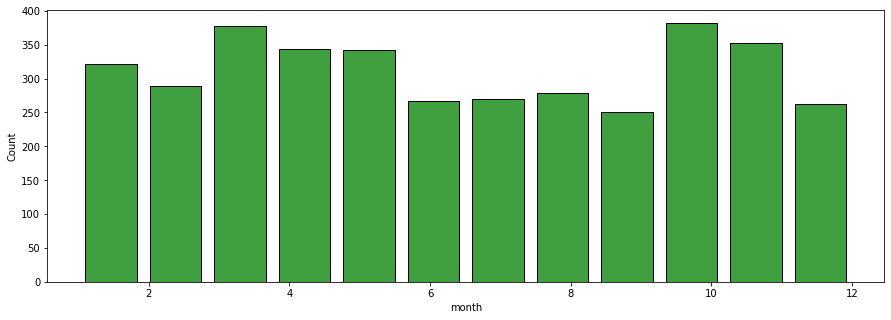

In [29]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'month', shrink = .8, bins = 12, color = 'green');

Pirate attacks remain generally consistent across months. With an exception of Feburary other months don't show a vast difference. Our inital assumption when looking at the month of February is that since its the one month that has the least amount of days, this may equate to less travel or merchant activity which leads to lower opportunites of pirate attacks. 

**Pirate attack locations over the course of 10 a year period**

In [10]:
# Attack by year ranges. This was to see if what changes in pirate activty occur over time
m = folium.Map()
for i, coord in df.iterrows():
    if coord.year <= 2013:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'red',
                            opacity = .5).add_to(m)
    elif coord.year < 2016 and coord.year > 2013:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'yellow',
                            opacity = .5).add_to(m)
    elif coord.year >= 2016:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'blue',
                            opacity = .5).add_to(m)

folium.TileLayer('Stamen Terrain').add_to(m)
m

#https://www.kaggle.com/anthaus/tuto-draw-nice-maps-with-folium
#https://deparkes.co.uk/2016/06/10/folium-map-tiles/

# Victims

Distribution of victim types:

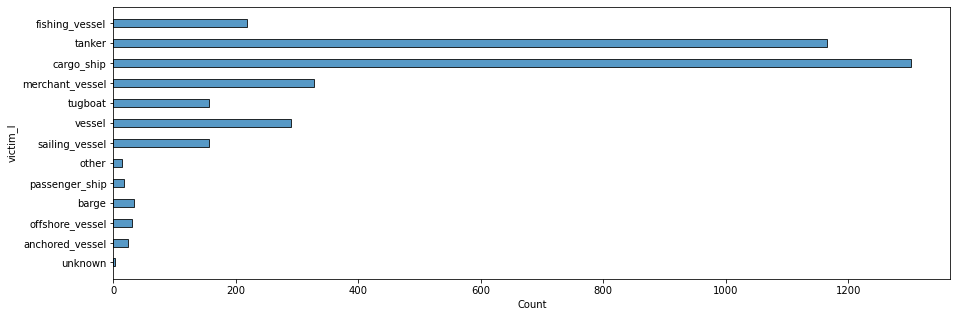

In [11]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, y = 'victim_l', shrink = .4);

**Which victim types are pirates most successfull against?**

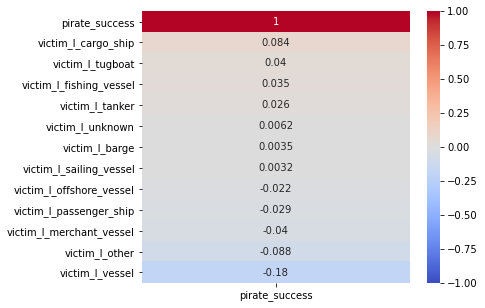

In [12]:
#Against what type of victims are pirate attacks most successful

victim_cols = [x for x in df.columns if x[:5] in 'victim_l' or x == 'pirate_success'][1:]

plt.figure(figsize=(6, 5))
sns.heatmap(df[victim_cols].corr()[['pirate_success']][1:].sort_values('pirate_success', ascending = False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Merchant vessels get attacked more than any other vessel by a wide margin. Cargo ships come in second. Both of these observations are not surprising given the profit to be gained. Attacks on sailing vessels, tugboats and tankers are interesting as they would seem to be less profitable endeavors. 

**Pirate attacks on non-commericial vessels**

In [13]:
m = folium.Map()
df[(df['victim_l_passenger_ship'] == 1) | (df['victim_l_sailing_vessel'] == 1)].apply(lambda x: folium.CircleMarker(location = (x['Y'], x['X']), radius = 1).add_to(m), axis = 1)
folium.TileLayer('CartoDB dark_matter').add_to(m)
m

#CartoDB dark_matter is used here for visibility as the points are sparse

# Poverty

**Attacks in areas where with high poverty percentage vs low poverty percentage**

In [44]:
# Attacks in areas where with high poverty percentage vs low poverty percentage
m = folium.Map(zoom_start= 2)
for i, coord in df[df['country'] != 'international waters'].iterrows():
    if coord.high_risk == 1:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            opacity = .5).add_to(m)
    elif coord.high_risk  == 0:
        folium.CircleMarker(location = (coord['Y'], coord['X']), 
                            radius = 1, 
                            color = 'orange',
                            opacity = .5).add_to(m)

folium.TileLayer('CartoDB positron').add_to(m)
m

#https://www.kaggle.com/anthaus/tuto-draw-nice-maps-with-folium
#https://deparkes.co.uk/2016/06/10/folium-map-tiles/

In [31]:
for i in df.columns:
    print(i)

X
Y
subreg
hostilitytype_l
victim_l
navarea
coords
country
year
month
day
subreg_11
subreg_12
subreg_13
subreg_18
subreg_21
subreg_22
subreg_23
subreg_24
subreg_25
subreg_26
subreg_27
subreg_28
subreg_36
subreg_37
subreg_44
subreg_51
subreg_52
subreg_53
subreg_54
subreg_55
subreg_56
subreg_57
subreg_61
subreg_62
subreg_63
subreg_71
subreg_72
subreg_73
subreg_74
subreg_81
subreg_82
subreg_83
subreg_91
subreg_92
subreg_93
subreg_94
subreg_95
subreg_96
subreg_97
hostilitytype_l_attempted_boarding
hostilitytype_l_hijacking
hostilitytype_l_kidnapping
hostilitytype_l_navel_engagement
hostilitytype_l_other
hostilitytype_l_pirate_assaults
hostilitytype_l_suspicious_approach
hostilitytype_l_unknown
victim_l_anchored_vessel
victim_l_barge
victim_l_cargo_ship
victim_l_fishing_vessel
victim_l_merchant_vessel
victim_l_offshore_vessel
victim_l_other
victim_l_passenger_ship
victim_l_sailing_vessel
victim_l_tanker
victim_l_tugboat
victim_l_unknown
victim_l_vessel
navarea_i
navarea_ii
navarea_iii
navar

In [34]:
#df[df['country'] != 'International Waters']

0        95.0
1       100.0
2         0.0
3         0.0
4         0.0
        ...  
3732      0.0
3733      0.0
3734     70.0
3735    100.0
3736      0.0
Name: sea_law_adoption, Length: 3737, dtype: float64

In [16]:
# poverty scores by region.